# RANDOM THINGS

In [ ]:
import pandas as pd

# Sample CSV loading
data = {
    '2018': [82, 151, 316, 219, 292, 214, 319, 445.5],
    '2019': [85, 175, 332, 221, 274, 231, 317, 464],
    '2020': [83, 176, 287, 215, 266, 227, 356, 442],
    '2021': [81, 184, 272, 223, 375, 270, 387, 437],
    '2022': [85, 194, 284, 236, 373, 258, 372, 451],
    '2023': [87, 217, 292, 275, 331, 284, 368, 486],
    '2024': [68, 206, 239, 241, 250, 256, 362, 407],
    '2025': [65, 214, 239, 244, 235, 261, 371, 412]
}

df = pd.DataFrame(data)
# Function to convert international to national rankings
def international_to_national_rankings(df):
    # Use argsort twice to get rankings: once for sorting order, second to get ranks
    ranked_df = df.apply(lambda x: x.argsort().argsort() + 1)
    return ranked_df

# Apply the function
national_ranks = international_to_national_rankings(df)

# Print or return the transformed DataFrame
print(national_ranks)
# Display the results
print("National Rankings by Year:")
print(national_ranks)


# Bar chart for rankings

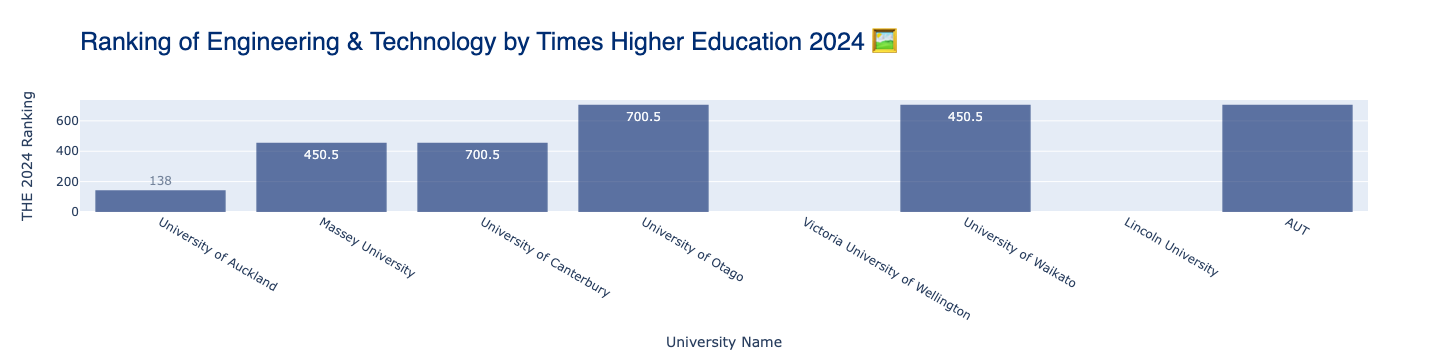

In [7]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Subject'Arts and humanities'
#import dataset

df = pd.read_csv('data.csv',
                 header=0,
                 usecols=["University Name", "Engineering & Technology ranking THE24"])


y=[138, 700.5, 450.5, 700.5, 450.5, 700.5]

colors = ['lightslategray',] * 5
colors[1] = 'crimson'

# #create bar chart
fig = go.Figure(data=[
    go.Bar(
        x=df['University Name'], 
        y=df['Engineering & Technology ranking THE24'],
        hovertext=[
            '1st place nationally, Ranked 113 in the world by THE 2024', 
            '=3rd place nationally, Ranked 350.5 in the world by THE 2024', 
            '4th place nationally, Ranked 450.5 in the world by THE 2024',
            '2nd place nationally, Ranked 188 in the world by THE 2024',
            '=3rd place nationally, Ranked 350.5 in the world by THE 2024',
            '=3rd place nationally, Ranked 350.5 in the world by THE 2024',
            '5th place nationally, Ranked 550.5 in the world by THE 2024',
            '=3rd place nationally, Ranked 350.5 in the world by THE 2024'
        ],
        text=y,  # Displaying the ranking as number on the bar
        textposition='auto',
 
    )
])


# Change the bar mode
# smallest ranking to largest ranking
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total ascending'})

# fig.update_layout(barmode='group')
fig.update_layout(
    barmode='group',
    xaxis_title="University Name",
    yaxis_title="THE 2024 Ranking"
),
fig.update_layout(
    title=go.layout.Title(
        text="Ranking of Engineering & Technology by Times Higher Education 2024 🖼️<br><sup>Hover on the bar to see specific national rankings 🤓</sup>",
        xref="paper",
        x=0
    ),),


fig.update_traces(marker_color='rgb(1,33,105)', marker_line_color='rgb(1,33,105)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(
    title={
        'text': "Ranking of Engineering & Technology by Times Higher Education 2024 🖼️",
        'font': {
            'family': "Raleway, sans-serif",
            'size': 25,
            'color': '#002D72'
        }
    }
)




fig.show() 

In [ ]:
#categorise pattern fill
fig = px.bar(df_melted, x='University Name', y='Subject Field', color="Subject",
             pattern_shape="Subject", pattern_shape_sequence=[".", "x", "+"])

# LINE CHART FOR RANKINGS

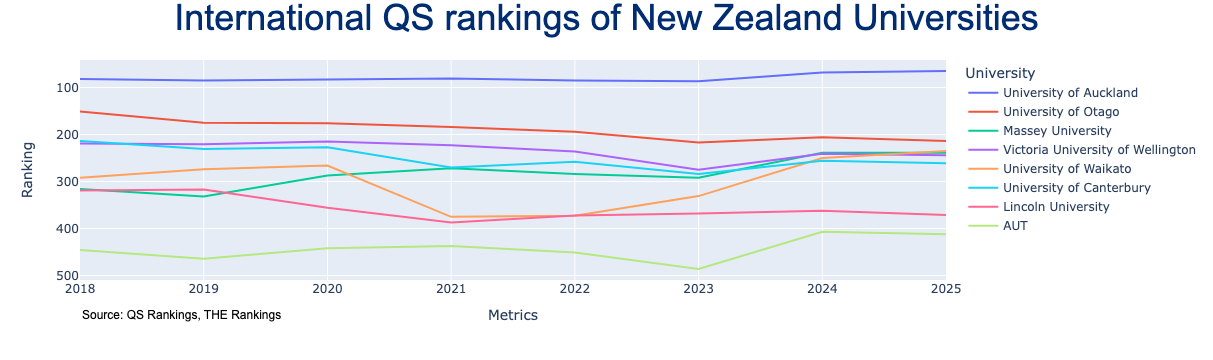

In [66]:
df = pd.read_csv('data.csv',
                 header=0,
                 usecols=["University Name", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])

# Melt the DataFrame to convert from wide to long format
df_long = df.melt(id_vars=['University Name'], var_name='Year', value_name='Ranking')

fig_line = px.line(df_long, x="Year", y="Ranking", color='University Name')

# Update layout for clarity
fig_line.update_layout(
    xaxis_title='Year',
    yaxis_title='QS Ranking',
    yaxis=dict(autorange='reversed'),  # Rankings: lower is better
    legend_title='University'
)

fig_line.update_layout(
    title={
        'text': "International QS rankings of New Zealand Universities",
        'font': {
            'family': "DIN Pro, Arial, sans-serif",
            'size': 36,
            'color': '#002D72'
        },
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'auto'
    },
    xaxis_title="Metrics",
    yaxis_title="Ranking",
  
    annotations=[
        dict(
            xref='paper', 
            yref='paper',
            x=0, 
            y=-0.2,
            showarrow=False,
            text="Source: <a href='https://www.topuniversities.com/universities/university-auckland'>QS Rankings</a>, <a href='https://www.timeshighereducation.com/world-university-rankings/university-auckland'>THE Rankings</a>",
            font=dict(
                family="Arial, sans-serif",
                size=12,
                color="black"
            )
        )
    ]
)


fig_line.show()

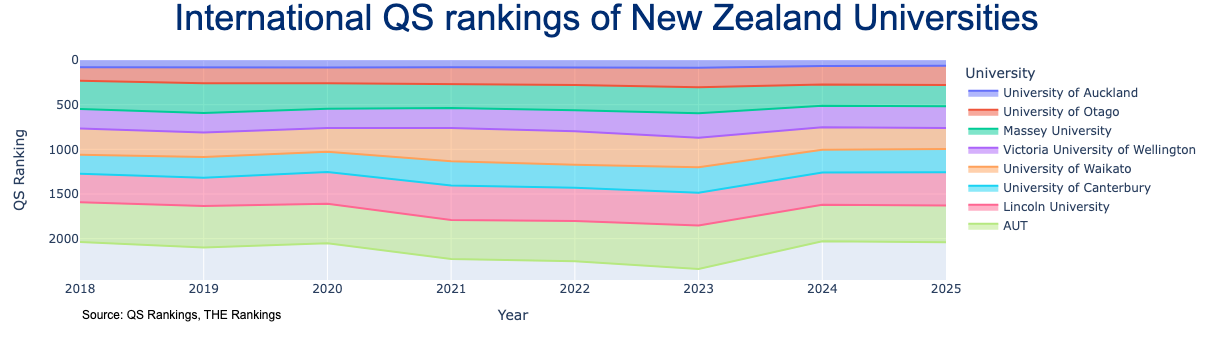

In [69]:
import pandas as pd
import plotly.express as px

# Read the dataset
df = pd.read_csv('data.csv', header=0, usecols=["University Name", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])

# Melt the DataFrame to convert from wide to long format
df_long = df.melt(id_vars=['University Name'], var_name='Year', value_name='Ranking')

# Create the area chart
fig_area = px.area(df_long, x="Year", y="Ranking", color='University Name')

# Update layout for clarity
fig_area.update_layout(
    xaxis_title='Year',
    yaxis_title='QS Ranking',
    yaxis=dict(autorange='reversed'),  # Rankings: lower is better
    legend_title='University'
)

# Update layout for title and annotations
fig_area.update_layout(
    title={
        'text': "International QS rankings of New Zealand Universities",
        'font': {
            'family': "DIN Pro, Arial, sans-serif",
            'size': 36,
            'color': '#002D72'
        },
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'auto'
    },
    xaxis_title="Year",
    yaxis_title="QS Ranking",
    annotations=[
        dict(
            xref='paper', 
            yref='paper',
            x=0, 
            y=-0.2,
            showarrow=False,
            text="Source: <a href='https://www.topuniversities.com/universities/university-auckland'>QS Rankings</a>, <a href='https://www.timeshighereducation.com/world-university-rankings/university-auckland'>THE Rankings</a>",
            font=dict(
                family="Arial, sans-serif",
                size=12,
                color="black"
            )
        )
    ]
)

# Show the figure
fig_area.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

#creating the line chart
df = pd.read_csv('data.csv',
                 header=0,
                 usecols=["University Name", "N2018", "N2019", "N2020", "N2021", "N2022", "N2023", "N2024", "N2025"])

# Melt the DataFrame to convert from wide to long format
df_long = df.melt(id_vars=['University Name'], var_name='Year', value_name='Ranking')

fig_line = px.line(df_long, x="Year", y="Ranking", color='University Name')

# Update layout for clarity
fig_line.update_layout(
    xaxis_title='Year',
    yaxis_title='QS Ranking',
    yaxis=dict(autorange='reversed'),  # Rankings: lower is better
    legend_title='University'
)
fig_line.update_layout(
    title=go.layout.Title(
        text="International QS rankings of New Zealand Universities<br><sup>Data from QS Top Universities from 2018 to 2025. (https://www.topuniversities.com)</sup>",
        xref="paper",
        x=0
    ),)


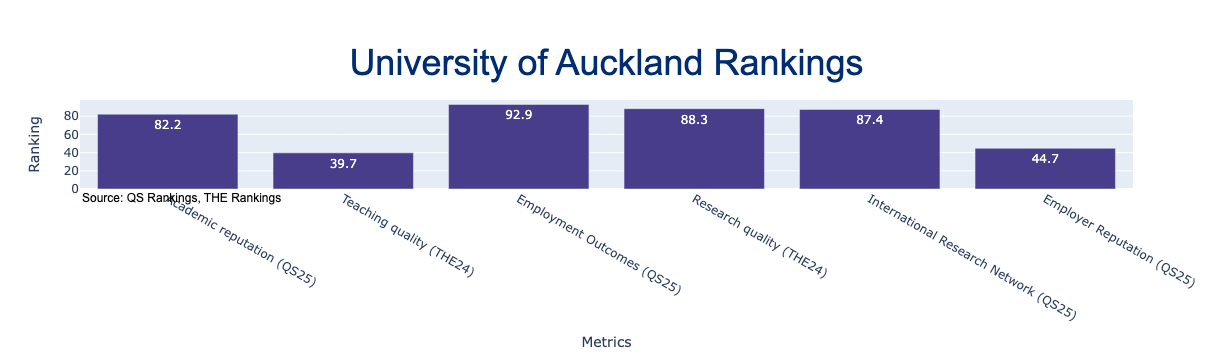

In [53]:
import pandas as pd
import plotly.graph_objects as go

# Read the dataset
df = pd.read_csv('data.csv', usecols=[
    "University Name", 
    "Academic reputation (QS25)", 
    "Teaching quality (THE24)", 
    "Employment Outcomes (QS25)", 
    "Research quality (THE24)", 
    "International Research Network (QS25)", 
    "Employer Reputation (QS25)"
])

# Filter the DataFrame to include only the row for "University of Auckland"
df_auckland = df[df['University Name'] == 'University of Auckland']

# Extract the relevant data for plotting
metrics = [
    "Academic reputation (QS25)", 
    "Teaching quality (THE24)", 
    "Employment Outcomes (QS25)", 
    "Research quality (THE24)", 
    "International Research Network (QS25)", 
    "Employer Reputation (QS25)"
]

# Extract the values
values = df_auckland[metrics].values.flatten().tolist()

# Create the bar chart
fig = go.Figure(go.Bar(
    x=metrics, 
    y=values, 
    marker_color='darkslateblue',
    text=values,  # Add text labels
    textposition='auto'  # Automatically position text labels
))

# Update layout
fig.update_layout(
    title={
        'text': "University of Auckland Rankings",
        'font': {
            'family': "DIN Pro, Arial, sans-serif",
            'size': 36,
            'color': '#002D72'
        },
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Metrics",
    yaxis_title="Ranking",
  
    annotations=[
        dict(
            xref='paper', 
            yref='paper',
            x=0, 
            y=-0.2,
            showarrow=False,
            text="Source: <a href='https://www.topuniversities.com/universities/university-auckland'>QS Rankings</a>, <a href='https://www.timeshighereducation.com/world-university-rankings/university-auckland'>THE Rankings</a>",
            font=dict(
                family="Arial, sans-serif",
                size=12,
                color="black"
            )
        )
    ]
)

# Show the figure
fig.show()


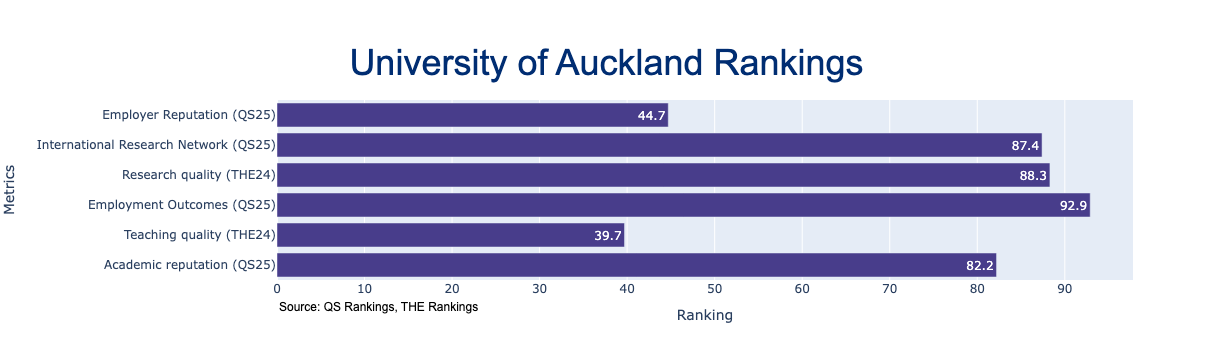

In [55]:
import pandas as pd
import plotly.graph_objects as go

# Read the dataset
df = pd.read_csv('data.csv', usecols=[
    "University Name", 
    "Academic reputation (QS25)", 
    "Teaching quality (THE24)", 
    "Employment Outcomes (QS25)", 
    "Research quality (THE24)", 
    "International Research Network (QS25)", 
    "Employer Reputation (QS25)"
])

# Filter the DataFrame to include only the row for "University of Auckland"
df_auckland = df[df['University Name'] == 'University of Auckland']

# Extract the relevant data for plotting
metrics = [
    "Academic reputation (QS25)", 
    "Teaching quality (THE24)", 
    "Employment Outcomes (QS25)", 
    "Research quality (THE24)", 
    "International Research Network (QS25)", 
    "Employer Reputation (QS25)"
]

# Extract the values
values = df_auckland[metrics].values.flatten().tolist()

# Create the horizontal bar chart
fig = go.Figure(go.Bar(
    y=metrics,  # Use metrics on y-axis for horizontal bars
    x=values,  # Use values on x-axis
    orientation='h',  # Set the orientation to horizontal
    marker_color='darkslateblue',
    text=values,  # Add text labels
    textposition='auto'  # Automatically position text labels
))

# Update layout
fig.update_layout(
    title={
        'text': "University of Auckland Rankings",
        'font': {
            'family': "DIN Pro, Arial, sans-serif",
            'size': 36,
            'color': '#002D72'
        },
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    yaxis_title="Metrics",
    xaxis_title="Ranking",
      # Reverse the x-axis to have higher rankings at the top
    annotations=[
        dict(
            xref='paper', 
            yref='paper',
            x=0, 
            y=-0.2,
            showarrow=False,
            text="Source: <a href='https://www.topuniversities.com/universities/university-auckland'>QS Rankings</a>, <a href='https://www.timeshighereducation.com/world-university-rankings/university-auckland'>THE Rankings</a>",
            font=dict(
                family="Arial, sans-serif",
                size=12,
                color="black"
            )
        )
    ]
)

# Show the figure
fig.show()


# radar chart

In [ ]:
fig.update_traces(fill='toself')

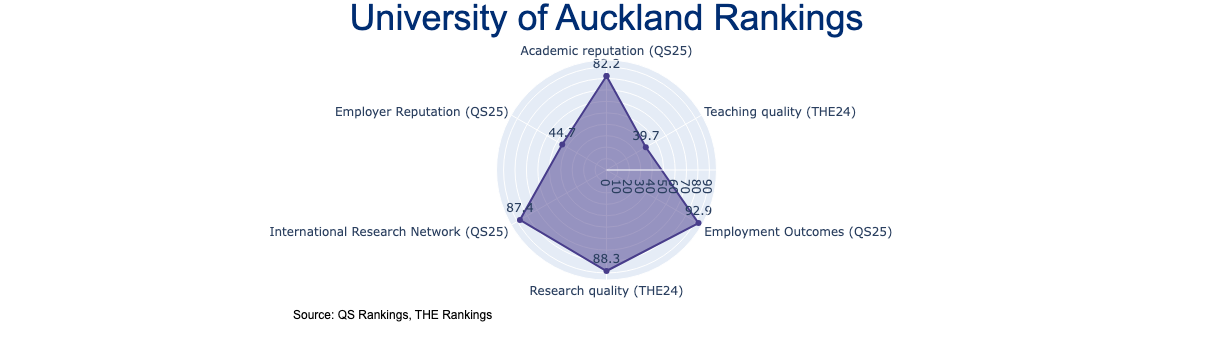

In [54]:
import pandas as pd
import plotly.express as px

# Read the dataset
df = pd.read_csv('data.csv', header=0, usecols=[
    "University Name", 
    "Academic reputation (QS25)", 
    "Teaching quality (THE24)", 
    "Employment Outcomes (QS25)", 
    "Research quality (THE24)", 
    "International Research Network (QS25)", 
    "Employer Reputation (QS25)"
])

# Filter the DataFrame to include only the row for "University of Auckland"
df_auckland = df[df['University Name'] == 'University of Auckland']

# Create the data for the radar chart
df_radar = pd.DataFrame(dict(
    r=df_auckland[[
        "Academic reputation (QS25)", 
        "Teaching quality (THE24)", 
        "Employment Outcomes (QS25)", 
        "Research quality (THE24)", 
        "International Research Network (QS25)", 
        "Employer Reputation (QS25)"
    ]].values.flatten().tolist(),
    theta=[
        'Academic reputation (QS25)', 
        'Teaching quality (THE24)', 
        'Employment Outcomes (QS25)', 
        'Research quality (THE24)', 
        'International Research Network (QS25)', 
        'Employer Reputation (QS25)'
    ]
))

# Create the radar chart
fig_radar = px.line_polar(df_radar, r='r', theta='theta', line_close=True)

# Update the traces to fill the area and set the fill color
fig_radar.update_traces(fill='toself', fillcolor='rgba(72, 61, 139, 0.5)', line_color='darkslateblue')

# Add data labels
fig_radar.update_traces(mode='lines+markers+text', text=df_radar['r'], textposition='top center')

# Update layout with title and annotations
fig_radar.update_layout(
    title={
        'text': "University of Auckland Rankings",
        'font': {
            'family': "DIN Pro, Arial, sans-serif",
            'size': 36,
            'color': '#002D72'
        },
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'auto'
    },
    annotations=[
        dict(
            xref='paper', 
            yref='paper',
            x=0.2, 
            y=-0.2,
            showarrow=False,
            text="Source: <a href='https://www.topuniversities.com/universities/university-auckland'>QS Rankings</a>, <a href='https://www.timeshighereducation.com/world-university-rankings/university-auckland'>THE Rankings</a>",
            font=dict(
                family="Arial, sans-serif",
                size=12,
                color="black"
            )
        )
    ]
)

# Show the figure
fig_radar.show()


EXTRA(for fun)

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure(go.Scattergeo())
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# LAYOUT

In [ ]:
# Run this app with `python app.py` and
# visit http://127.0.0.1:8050/ in your web browser.


from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == "__main__":
    app.run_server(debug=True, port=8058)


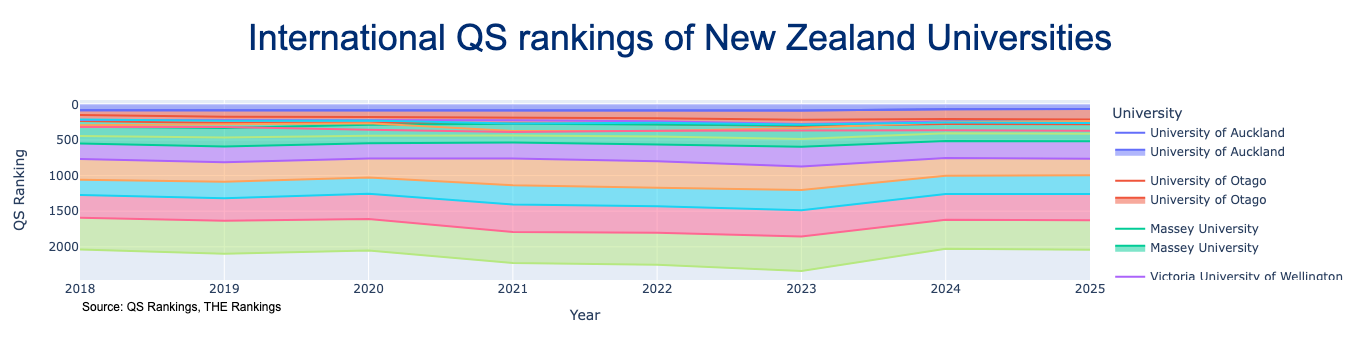

In [76]:
import pandas as pd
import plotly.express as px

# Read the dataset
df = pd.read_csv('data.csv', header=0, usecols=["University Name", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"])

# Melt the DataFrame to convert from wide to long format
df_long = df.melt(id_vars=['University Name'], var_name='Year', value_name='Ranking')

# Create the line chart
fig_line = px.line(df_long, x="Year", y="Ranking", color='University Name')

# Create the area chart
fig_area = px.area(df_long, x="Year", y="Ranking", color='University Name', line_group='University Name')

# Update the layout for both figures
fig_line.update_layout(
    xaxis_title='Year',
    yaxis_title='QS Ranking',
    yaxis=dict(autorange='reversed'),  # Rankings: lower is better
    legend_title='University',
    title={
        'text': "International QS rankings of New Zealand Universities",
        'font': {
            'family': "DIN Pro, Arial, sans-serif",
            'size': 36,
            'color': '#002D72'
        },
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'auto'
    },
    annotations=[
        dict(
            xref='paper', 
            yref='paper',
            x=0, 
            y=-0.2,
            showarrow=False,
            text="Source: <a href='https://www.topuniversities.com/universities/university-auckland'>QS Rankings</a>, <a href='https://www.timeshighereducation.com/world-university-rankings/university-auckland'>THE Rankings</a>",
            font=dict(
                family="Arial, sans-serif",
                size=12,
                color="black"
            )
        )
    ]
)

# Update the area chart layout to match the line chart


# Combine the line and area charts
fig_combined = go.Figure(data=fig_area.data + fig_line.data)

fig_combined.update_layout(
    xaxis_title='Year',
    yaxis_title='QS Ranking',
    yaxis=dict(autorange='reversed'),  # Rankings: lower is better
    legend_title='University',
    title={
        'text': "International QS rankings of New Zealand Universities",
        'font': {
            'family': "DIN Pro, Arial, sans-serif",
            'size': 36,
            'color': '#002D72'
        },
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'auto'
    },
    annotations=[
        dict(
            xref='paper', 
            yref='paper',
            x=0, 
            y=-0.2,
            showarrow=False,
            text="Source: <a href='https://www.topuniversities.com/universities/university-auckland'>QS Rankings</a>, <a href='https://www.timeshighereducation.com/world-university-rankings/university-auckland'>THE Rankings</a>",
            font=dict(
                family="Arial, sans-serif",
                size=12,
                color="black"
            )
        )
    ]
)


# Show the combined figure
fig_combined.show()
